In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/NVDA.csv')
print(df.head())
print(df.columns)

Loading data from ../data/NVDA.csv...
         Date     Close      High       Low      Open      Volume
0  2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
1  2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2  2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
3  2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
4  2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std           min           25%  \
Close   3774.0  6.796822e+00  1.065975e+01  1.652686e-01  3.573966e-01   
High    3774.0  6.915713e+00  1.084353e+01  1.712284e-01  3.624222e-01   
Low     3774.0  6.666721e+00  1.046139e+01  1.622887e-01  3.517434e-01   
Open    3774.0  6.793541e+00  1.065914e+01  1.652686e-01  3.570170e-01   
Volume  3774.0  5.230753e+08  3.205760e+08  4.564400e+07  3.188510e+08   

                 50%           75%           max  
Close   1.167304e+00  7.018725e+00  5.037931e+01  
High    1.176017e+00  7.091671e+00  5.051822e+01  
Low     1.157976e+00  6.849259e+00  4.938724e+01  
Open    1.166935e+00  6.939958e+00  5.018228e+01  
Volume  4.495585e+08  6.419770e+08  3.692928e+09  


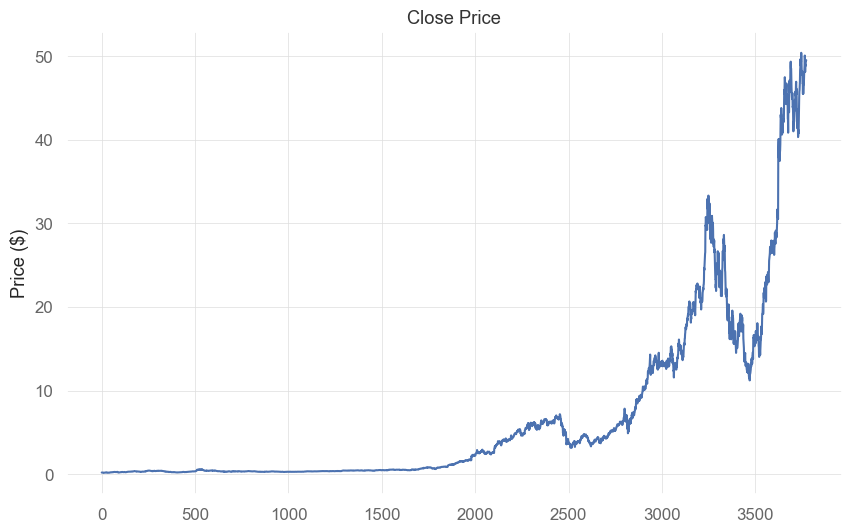

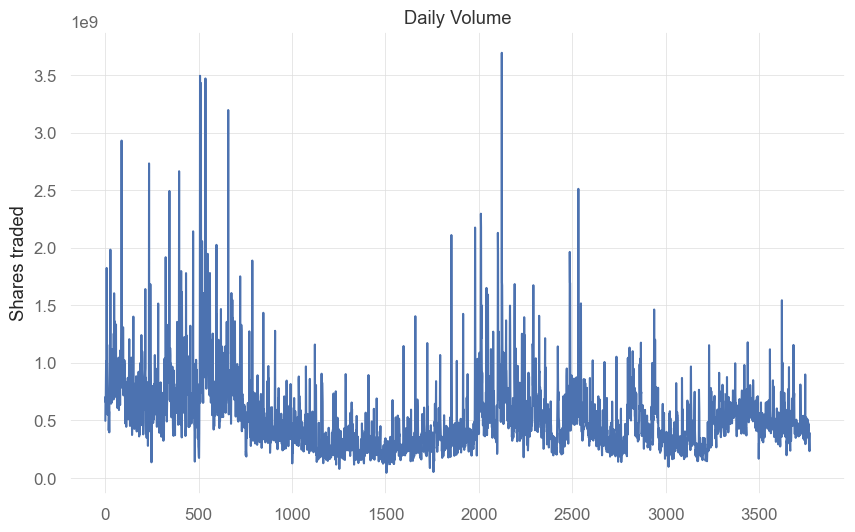

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,48.805527,49.358247,48.442706,49.170342,252507000.0,47.706983,46.257777,48.024644,55.352119,0.634352,0.564438,0.069914
3770,2023-12-26,49.254299,49.575137,48.935459,48.943454,244200000.0,47.759019,46.334178,48.141754,57.245971,0.655689,0.582688,0.073001
3771,2023-12-27,49.392231,49.655100,49.060397,49.486186,233648000.0,47.838989,46.400666,48.260847,57.837928,0.675937,0.601338,0.074599
3772,2023-12-28,49.497185,49.859003,49.387239,49.618126,246587000.0,47.908266,46.512367,48.378593,58.310919,0.692470,0.619564,0.072906
3773,2023-12-29,49.497185,49.971949,48.726571,49.788039,389293000.0,48.046003,46.658888,48.485126,58.310919,0.697532,0.635158,0.062374


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["NVDA", "AMZN","GOOG","MSFT", "META", "AAPL"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
NVDA           52.78%
AMZN            0.00%
GOOG           47.22%
MSFT            0.00%
META            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
NVDA            0.00%
AMZN            0.00%
GOOG           15.39%
MSFT           47.22%
META            0.98%


Price & Moving Averages


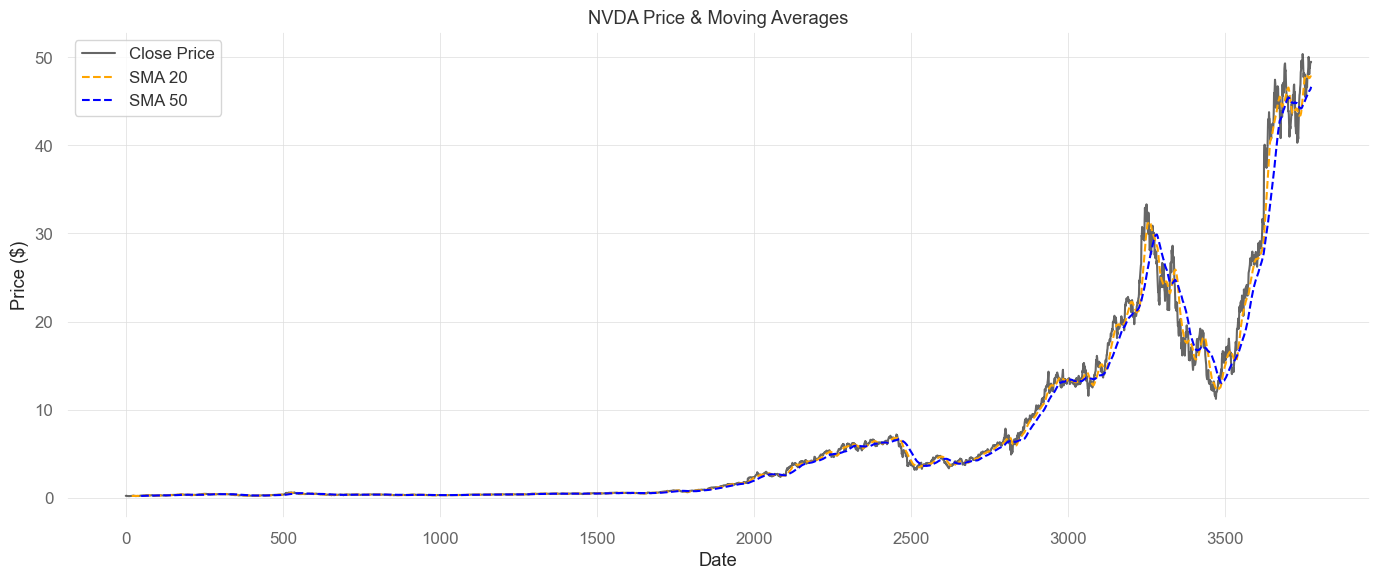

In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('NVDA Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

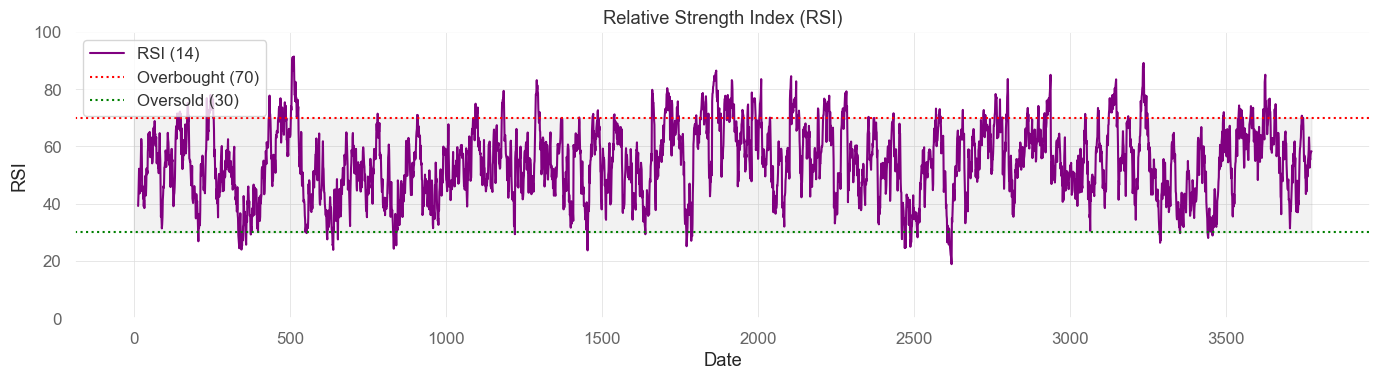

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


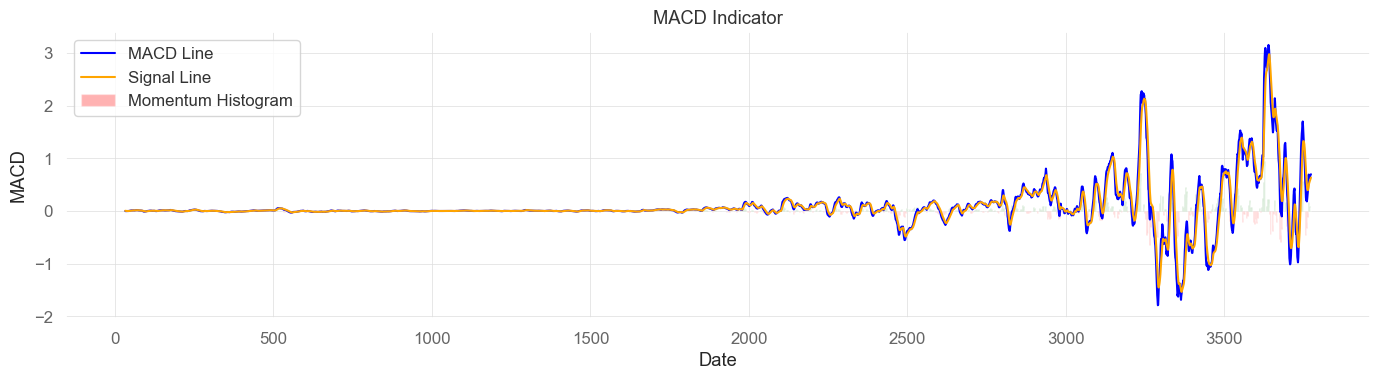

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()